# This is the template for coursework B - Add a suitable title

<div class="alert alert-block alert-danger">
<b>Candidate number: Your candidate number here (this is a five digit number). </b>

- This Coursework contributes <b>80%</b> to your overall unit mark.

- Will be marked anonymously.

- Keep to word limits (+- a few words).

- You can use the WordCounter notebook to check your word count.

- Code & figure captions do not count towards word limits.
</div>

### Abstract: 

Here, give an overview of your work, make sure to describe the science background, methods, results as well as comparisons to literature data. Keep this short.
<div class="alert alert-block alert-danger">
    
<b>word limit 250 words.</b>

#### Imports: give all your imports in a box here. Any custom code you have stored in a .py file needs to be submitted with your coursework. You can freely use all code provided to you as part of this course. If you use code not encountered in the course, give a link to the online repo.

In [3]:
import numpy
from astropy.io import fits 
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

<div class="alert alert-block alert-danger">
<b>Make sure to include the relevant python files in your upload</b>

### 1. Introduction:

Give an introduction to your coursework. This should be a short description of exoplanets as well as a description of background relevant to your Discussion.

Your introduction should be understandable to a student having taken Intro to astro and Planets & Exoplanets. 

<div class="alert alert-block alert-danger">
<b>Word limit: 600 words</b>

Exoplanets can be detected via transit methods, radial velocity, direct imaging, microlensing and astrometry. Here, we are going to discuss the transit method and use it to first 'detect' planets orbiting a star system and then derive physical properties of the planets. In order to use the transit method, there are certain conditions that must be met for detection to be effective. Firstly, the system must be observed edge on such that the planets transit across the face of the star, ideally with inclination of 90 degrees or close to, so a difference in flux can be measured. It follows that the planets must not orbit too far away from the star either, and they must be of significant size in order for the flux drop to be observed. These conditions set up selection effects that influence the type of stars that may be discovered via the transit method.

From a typical transit lightcurve the ratio of planetery radius to stellar radius can be determined from observations of flux change as shown by Mandel & Agol (2002). In general, there is a degeneracy bewteen the raduis and mass of the host star, however this can be broken by taking photospheric measurements of the star which according to Agol (2005) has "a precision limited to ~5%". In this case we do not consider the additional measuremnets required, and instead start with prior knowledge of the mass and radius of the host star. This means that we can extract the radius of the planet. Exact mass values cannot be determined without the use of radial velocity measuremenets, so assuming these are taken and that we have the masses of the planets we can move on to extracting further physical characteristics such as density.

The period of a singular planet around a star is generally fixed, however in a multi-planetary system the planets will experience pertubations due to their gravitational interaction with each other. These pertubations lead to to transit timing variations (TTVs) (Haghighipour 2015) which cause the orbiting planets to transit earlier or later than expected. When planets have periods that are nearly multiples of each other, and assuming they are in orbital alignment, then they are said to be in mean motion resonance (MMR)(Barnes 2011). The greatest TTVs occur when planets are in MMR, and such measured variations can provide enough information to get constraints on the masses. However, due to a degeneracy between mass and free eccentricity, we are only able to derive ratios/limits for the masses of the planets if free eccentricity is considered negligible- breaking the degeneracy- which Lithwick et al 2012 suggests is true for most planetary systems. In this case, the amplitude of the TTV is proportional to a ratio involving the planetary masses.

In this work we find that infact the two planets are in MMR which presents the opportunity to determine their mass ratios by anaylsis of their TTVs and compare it to the expected ratios given the known masses. However, the fact that the planets exhibit TTVs presents a seperate challenge in first fitting the transits, beacuse it means that the folded lightcurves do not superimpose on top of each other exactly. In the following results and discussion, we will look at the exctraction and modelling of the lightcurves, the physiscal parameters of the planets, and how the planets compare to the general exoplanet population.



### 2. Results - Modelling of Kepler lightcurve

$\bullet$ describe fitting of transit depths and present results with errors -(explain attempt of folding lightcurve TTVs, quadratic and quartic fit overshot base- chi squared,pcov etc, use of mean base values and associated errors)

$\bullet$ describe periodogram and identification of periodic features in lightcurves -(lomb scargle, folded lightcurves, plot of vertical lines on main lightcurve)

$\bullet$ describe motivation for any additional fitting you have done (better fit with piecewise func?)

$\bullet$ include code for all modelling in attached code or inline, describe limitations and assumptions made

<div class="alert alert-block alert-danger">
    
<b>Keep this concise: word limit 750 words</b>

In order to find the number of planets in this system and their respective periods, we first make use of a lomb-scargle periodogram with the normalised lightcurve data. This is done twice so that we are left with only the most prominent peaks that correspond to the periods of the orbiting planets. One can then fold the normalised lightcurve on these periods (adjusting period as necessary to get better folds) to obtain several superimposed transits of the same planet, with the aim of finding a fit that holds generally for all the transits. From the periodogram there are two main peaks at 19.25 and 38.45. If plotted over a larger range then several more peaks are visible, however these correspond to period multiples and are not different planets. While one may then argue that the ~38day period could just be a multiple of the ~19day period, folding the lightcurve at 38.45 reveals that they are infact different, as an additional smearing of transits can be seen but only surrounding every other main transit dip. This smearing suggests the planets are in MMR and also explains why neither of the folded lightcurves about the relevent periods produce clean transits. Since the periods of the planets suffer from significant TTVs, it is impossible to get a meaningful transit curve that can be accurately modelled by folding the lightcurve. From here on out, I will refer to the planet with a 19 day period as "Peanut Butter" and the planet with a 38 day period as "Strawberry Jelly".

To work around the TTVs, vertical lines are plotted over the original normalised lightcurve that help to indicate which transit belongs to which planet. Plotting periodic lines also helps to determine what the best 'true' period is for the planets which was found to be 19.23 days and 38.938 days, by virtue of observing which period value led to the most number of transits coinciding with a line. The transits can also be distinguished by their depths, with Peanut Butter being the deeper of the two, however this can be dificult to do at a glance which makes the colour coded vertical lines the preferred differentiator.

Using the coloured lines as a guide, five transits for each planet were picked out from the lightcurve and individually fitted. Both quartic and quadratic fits were tried, with the quartic proving to be the better option to match the flatter base of the transits. This can be seen in FIGURE AND FIGURE where one transit for each planet has been fit with both quartic and quadratic for comparison. Quantitatively, this choice can also be supported by comparing the reduced $\chi^2$ statistics, 22.42 and 22.48 for quadratic with 0.72 and 2.73 for quartic, and by observation of the residual spreads shown in FIGURES.

To fit the flux baseline, the average of the points on either side of the curve were taken and plotted as a horizontal line. The baseline and curve were fitted seperately beacuse if combined, then the quartic fucntion output a much less ideal fit. From the individual fits a mid-point of each transit was detemined, enabling all of the transits to be stacked on top of each other, and centered at 0.0. The different baselines were then averaged and plotted as one single line across the stacked transits. A final fit was made for the combined plot of five transits and the depth was determined by taking the minimum of the overall fit subtracted from the average baseline value. For Peanut Butter the depth was determined to be 0.006611 +/- 0.000074, and for Strawberry Jelly the depth was 0.00566 +/- 0.00010. Error on depth comes from the assosiated diagonal element from the covariance matrix of the fit, beacuse depth is one of the free parameters defined in the quartic function. 


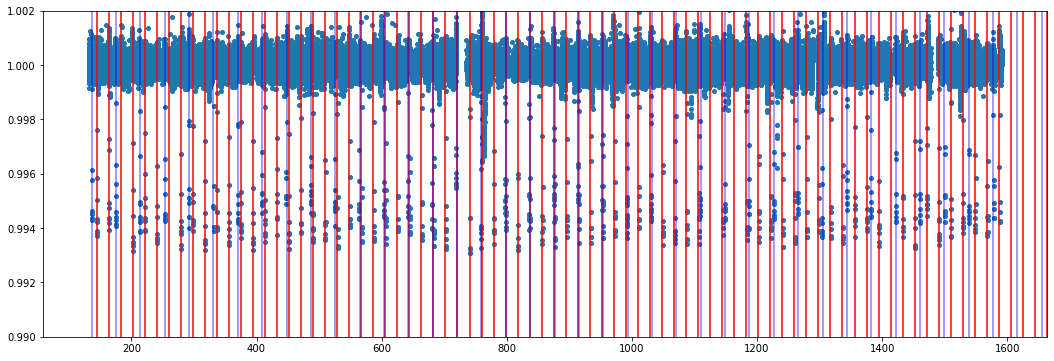

In [4]:
curve = pd.read_csv('normalised_curve', delimiter =',', usecols=[0,1,2], names=['time', 'flux', 'error'])
plt.figure(figsize=(18,6))
plt.plot(curve['time'],curve['flux'], ls='None',marker ='o', markersize=4)
plt.ylim(0.99,1.002)

#expercted periods of planets
actper = 19.23 
actper2 =38.938

#plotting vertical lines where transits should be
#red identifys P~19day planet, blue identifys P~38day planet
for i in range(80):
    plt.axvline((actper*i+144.243013), c='r')
for i in range(40):
    plt.axvline((actper2*i+136.451013), c='b', alpha=0.5)

19.245724572457245 38.462046204620464


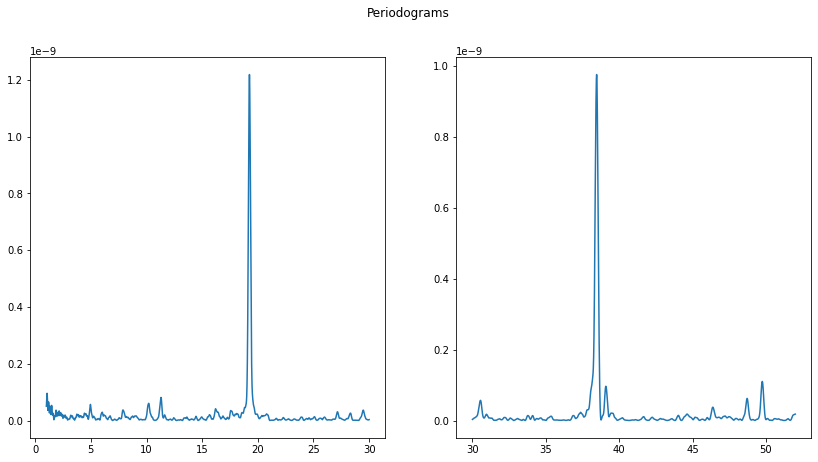

In [5]:
freqs = np.linspace((1/1459.5),(1/0.021), 3000)
lomb = scipy.signal.lombscargle(curve['time'], curve['flux'], freqs, precenter=True)

period1 =np.linspace(1,30,10000)
period2 =np.linspace(30,52,10000)
lomb1 = scipy.signal.lombscargle(freqs, lomb, period1, precenter=True)
lomb2 = scipy.signal.lombscargle(freqs, lomb, period2, precenter=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(14)
fig.suptitle('Periodograms')
ax1.plot(period1, lomb1)
ax2.plot(period2, lomb2)

print(period1[np.argmax(lomb1)], period2[np.argmax(lomb2)])

In [7]:
def para(x,b,c,d,e,f):
    return b*x**4 + c*x**3 + d*x**2 + e*x +f 

def quartic(x,beg,end,depth):
    y=((1-depth)*(2/(end-beg))**4)*(x-(end+beg)*0.5)**4 + depth
    return y

def chisquared(y, error, ymodel):
    return np.sum((y-ymodel)**2/error**2)

def baseline(beg1,end1,beg2,end2):
    basemask1 = (curve['time']>beg1) & (curve['time']<end1)
    basemask2 = (curve['time']>beg2) & (curve['time']<end2)
    baseline = (np.mean(curve['flux'][basemask1])+np.mean(curve['flux'][basemask2]))/2
    return baseline

0.006610998115959776
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


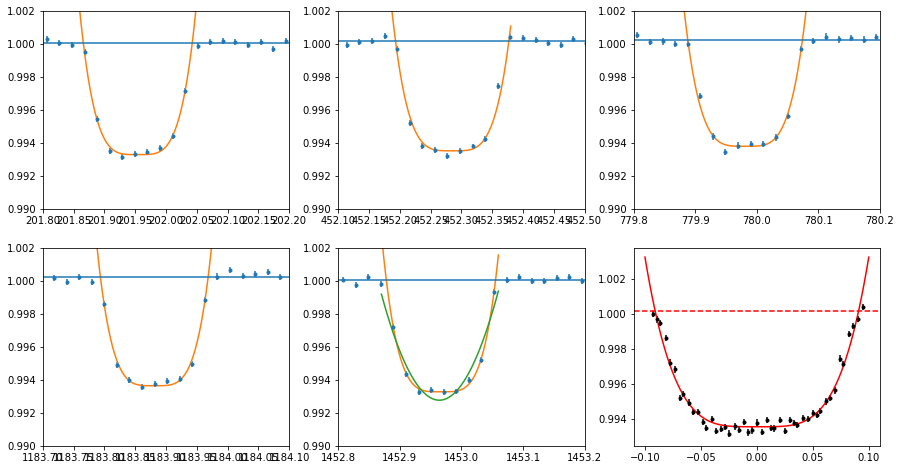

In [8]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 3, 1)
xrange191=np.linspace(201.86,202.05,100)
mask191 = (curve['time']>201.86) & (curve['time']<202.05)
popt191, pcov191 = curve_fit(quartic,curve['time'][mask191], curve['flux'][mask191], sigma=curve['error'][mask191],p0=(201.85,202.05,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(201.8,202.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange191, *popt191)
plt.plot(xrange191,ydata)
base191=baseline(201.8,201.86,202.05,202.2)
plt.axhline(base191)


ax2 = fig.add_subplot(2, 3, 2)
xrange192=np.linspace(452.18,452.38,100)
mask192 = (curve['time']>452.18) & (curve['time']<452.38)
popt192, pcov192 = curve_fit(quartic,curve['time'][mask192], curve['flux'][mask192], sigma=curve['error'][mask192],p0=(452.1,452.4,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(452.1,452.5)
plt.ylim(0.99,1.002)

ydata=quartic(xrange192, *popt192)
plt.plot(xrange192,ydata)
base192=baseline(452.1,452.18,452.38,452.5)
plt.axhline(base192)


ax3 = fig.add_subplot(2, 3, 3)
xrange193=np.linspace(779.88,780.08,100)
mask193 = (curve['time']>779.88) & (curve['time']<780.08)
popt193, pcov193 = curve_fit(quartic,curve['time'][mask193], curve['flux'][mask193], sigma=curve['error'][mask193],p0=(779.85,780,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(779.8,780.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange193, *popt193)
plt.plot(xrange193,ydata)
base193=baseline(779.80,779.88,780.08,780.2)
plt.axhline(base193)


ax4 = fig.add_subplot(2, 3, 4)
xrange194=np.linspace(1183.78,1183.98,100)
mask194 = (curve['time']>1183.78) & (curve['time']<1183.98)
popt194, pcov194 = curve_fit(quartic,curve['time'][mask194], curve['flux'][mask194], sigma=curve['error'][mask194],p0=(1183.8,1183.95,0.007))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1183.7,1184.1)
plt.ylim(0.99,1.002)

ydata=quartic(xrange194, *popt194)
plt.plot(xrange194,ydata)
base194=baseline(1183.7,1183.78,1183.98,1184.1)
plt.axhline(base194)


ax5 = fig.add_subplot(2, 3, 5)
xrange195=np.linspace(1452.87,1453.06,100)
mask195 = (curve['time']>1452.87) & (curve['time']<1453.06)
popt195, pcov195 = curve_fit(quartic,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195],p0=(1452.85,1453,0.007))
popt1955, pcov1955 = curve_fit(para,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195])

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1452.8,1453.2)
plt.ylim(0.99,1.002)
    
ydata=quartic(xrange195, *popt195)
plt.plot(xrange195,ydata)
plt.plot(xrange195,para(xrange195,*popt1955))
base195=baseline(1452.8,1452.87,1453.06,1453.2)
plt.axhline(base195)


ax6 = fig.add_subplot(2, 3, 6)
times19=pd.concat([curve['time'][mask191]-(popt191[1]+popt191[0])*0.5,curve['time'][mask192]-(popt192[1]+popt192[0])*0.5,curve['time'][mask193]-\
                (popt193[1]+popt193[0])*0.5,curve['time'][mask194]-(popt194[1]+popt194[0])*0.5,curve['time'][mask195]-(popt195[1]+popt195[0])*0.5])
fluxes19=pd.concat([curve['flux'][mask191],curve['flux'][mask192],curve['flux'][mask193],curve['flux'][mask194],curve['flux'][mask195]])
errors19=pd.concat([curve['error'][mask191],curve['error'][mask192],curve['error'][mask193],curve['error'][mask194],curve['error'][mask195]])

plt.errorbar(times19,fluxes19,errors19,ls='None', markersize=3, color='k', marker='o')
popt19,pcov19 = curve_fit(quartic,times19,fluxes19, sigma=errors19, p0=(-0.1,0.1,0.007))
xrange19= np.linspace(-0.1,0.1,100)
plt.plot(xrange19,quartic(xrange19,*popt19),color='r')

baseline19= np.mean([base191,base192,base193,base194,base195])
plt.axhline(baseline19,ls='--', color='r')

print(baseline19-np.min(quartic(xrange19,*popt19))) #depth of fit
print(np.sqrt(np.diag(pcov19))) #error on transit time beginning, end and depth


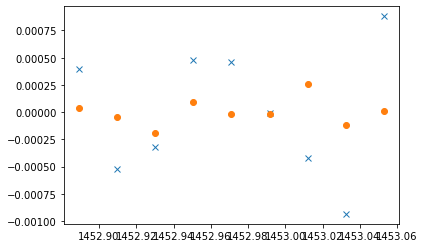

In [9]:
plt.plot(curve['time'][mask195],curve['flux'][mask195]- para(curve['time'][mask195], *popt1955),ls='None', marker ='x')
plt.plot(curve['time'][mask195],curve['flux'][mask195]- quartic(curve['time'][mask195], *popt195),ls='None', marker ='o')

In [10]:
chisquared(curve['flux'][mask195],curve['error'][mask195], quartic(curve['time'][mask195], *popt195))/6

0.7152718353019235

In [11]:
chisquared(curve['flux'][mask195],curve['error'][mask195], para(curve['time'][mask195], *popt1955))/4

22.428459703260966

0.005655826933487318
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


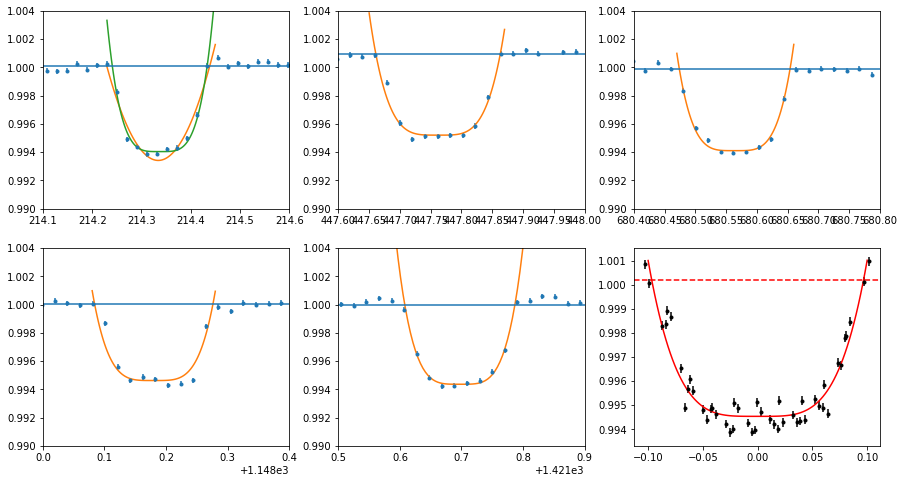

In [12]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 3, 1)
xrange381=np.linspace(214.23,214.45,100)
mask381 = (curve['time']>214.23) & (curve['time']<214.45)
popt3811, pcov3811 = curve_fit(para,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381])
popt381, pcov381 = curve_fit(quartic,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381],p0=(214.2,214.45,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(214.1,214.6)
plt.ylim(0.99,1.004)

plt.plot(xrange381, para(xrange381, *popt3811))
ydata=quartic(xrange381, *popt381)
plt.plot(xrange381,ydata)
base381=baseline(214.1,214.23,214.45,214.6)
plt.axhline(base381)


ax2 = fig.add_subplot(2, 3, 2)
xrange382=np.linspace(447.65,447.87,100)
mask382 = (curve['time']>447.65) & (curve['time']<447.87)
popt382, pcov382 = curve_fit(quartic,curve['time'][mask382], curve['flux'][mask382], sigma=curve['error'][mask382],p0=(447.65,447.85,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(447.6,448)
plt.ylim(0.99,1.004)
    
ydata=quartic(xrange382, *popt382)
plt.plot(xrange382,ydata)
base382=baseline(447.6,447.65,447.87,448)
plt.axhline(base382)


ax3 = fig.add_subplot(2, 3, 3)
xrange383=np.linspace(680.47,680.66,100)
mask383 = (curve['time']>680.47) & (curve['time']<680.66)
popt383, pcov383 = curve_fit(quartic,curve['time'][mask383], curve['flux'][mask383], sigma=curve['error'][mask383],p0=(680.4,680.6,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(680.4,680.8)
plt.ylim(0.99,1.004)

ydata=quartic(xrange383, *popt383)
plt.plot(xrange383,ydata)
base383=baseline(680.4,680.47,680.66,680.8)
plt.axhline(base383)


ax4 = fig.add_subplot(2, 3, 4)
xrange384=np.linspace(1148.08,1148.28,100)
mask384 = (curve['time']>1148.08) & (curve['time']<1148.28)
popt384, pcov384 = curve_fit(quartic,curve['time'][mask384], curve['flux'][mask384], sigma=curve['error'][mask384],p0=(1148.08,1148.27,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1148,1148.4)
plt.ylim(0.99,1.004)
    
ydata=quartic(xrange384, *popt384)
plt.plot(xrange384,ydata)
base384=baseline(1148,1148.1,1148.27,1148.4)
plt.axhline(base384)


ax5 = fig.add_subplot(2, 3, 5)
xrange385=np.linspace(1421.5,1421.9,100)
mask385 = (curve['time']> 1421.62 ) & (curve['time'] < 1421.78)
popt385, pcov385 = curve_fit(quartic,curve['time'][mask385], curve['flux'][mask385], sigma=curve['error'][mask385],p0=(1421.6,1421.8,0.006))

plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
plt.xlim(1421.5,1421.9)
plt.ylim(0.99,1.004)

ydata=quartic(xrange385, *popt385)
plt.plot(xrange385,ydata)
base385=baseline(1421.5,1421.6,1421.77,1421.9)
plt.axhline(base385)


ax6 = fig.add_subplot(2, 3, 6)
times38=pd.concat([curve['time'][mask381]-(popt381[1]+popt381[0])*0.5,curve['time'][mask382]-(popt382[1]+popt382[0])*0.5,curve['time'][mask383]-\
                (popt383[1]+popt383[0])*0.5,curve['time'][mask384]-(popt384[1]+popt384[0])*0.5,curve['time'][mask385]-(popt385[1]+popt385[0])*0.5])
fluxes38=pd.concat([curve['flux'][mask381],curve['flux'][mask382],curve['flux'][mask383],curve['flux'][mask384],curve['flux'][mask385]])
errors38=pd.concat([curve['error'][mask381],curve['error'][mask382],curve['error'][mask383],curve['error'][mask384],curve['error'][mask385]])

plt.errorbar(times38,fluxes38,errors38,ls='None', markersize=3, marker='o',color='k')
popt38,pcov38 = curve_fit(quartic,times38,fluxes38, sigma=errors38, p0=(-0.1,0.1,0.006))
xrange38= np.linspace(-0.1,0.1,100)
plt.plot(xrange38,quartic(xrange38,*popt38),color='r')

baseline38= np.mean([base381,base382,base383,base384,base385])
plt.axhline(baseline38,ls='--', color='r')

print(baseline38-np.min(quartic(xrange38,*popt38)))
print(np.sqrt(np.diag(pcov19)))

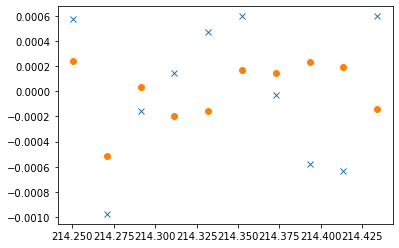

In [13]:
plt.plot(curve['time'][mask381],curve['flux'][mask381]- para(curve['time'][mask381], *popt3811),ls='None', marker ='x')
plt.plot(curve['time'][mask381],curve['flux'][mask381]- quartic(curve['time'][mask381], *popt381),ls='None', marker ='o')

In [14]:
chisquared(curve['flux'][mask381],curve['error'][mask381], para(curve['time'][mask381], *popt3811))/4

22.484628054540675

In [15]:
chisquared(curve['flux'][mask381],curve['error'][mask381], quartic(curve['time'][mask381], *popt381))/6

2.725571583096421

### 3. Discussion

$\bullet$ present comparison of your results with data, including statistical analyis and clear figures. -(compare to known values,selection effects, describe TTV mass constraints and whether agree?) 

$\bullet$ limit yourself in the presentation of results, focus on fewer results that are described well, rather than presenting many figures without clear context

$\bullet$ Include a short (~ 200 word) description of a follow-up observations that would address an open question in your report. -(how to improve TTV measurements?)


<div class="alert alert-block alert-danger">
<b>Word limit: 2000 words</b>

In [1]:
print(5.66e7/6371e3)
print(5.23e7/6371e3)

8.884005650604301
8.209072359127296


From the depth of the transits we can calculate the radius of the planets using the equation $$\frac{\delta F}{F}=(\frac{R_{planet}}{R_{star}})^2\tag{1}$$, where ${\delta F}$ is the depth of the transits, $F$ is the mean calculated baseline, $R_{star}$ is the radius of the host star which we take to be the radius of the sun $R_{sun}\pm 0.01 R_{sun}$, and $R_{planet}$ is our unknown planetary radius. The error in baseline is calculated as the range of the baselines which were averaged over. Solving for the planetary radii and propagating the errors through, we find that Peaunut Butter has a radius of (5.66$\pm$0.06) x $10^7$m and Strawberry Jelly has a radius of (5.23$\pm$0.07) x $10^7$m. The radii are quite close in value, however this is expected given that they have depths only approximately 0.001 apart.

With the mass of the planets taken to be (43.3 +1.6/-2) Earth masses for Peanut Butter and (29.1 +1.1/-1.3) Earth masses for Strawberry Jelly, an average density $\rho$ can be calculated using $$\rho= \frac{3M}{4\pi R^3}\tag{2}$$ which assumes the planets are spherical. Note that there are uneven errors on the planetary masses, meaning the upper and lower bounds of the absolute uncertainties propagate through to upper and lower bound uncertainties of average density too. Further knowledge of the host star's mass, taken to be 1 $\pm$ 0.01 Solar masses, paves the way for determination of the semi-major axis $a$ using Kepler'd 3rd Law $$a=(\frac{GM_{star}P^2}{2\pi})^{1/3} \tag{3}$$. It was calculated that Peanut Butter has an average density of (3.41 +0.17/-0.19) x $10^2$ kg/m$^3$ with a semi major axis of (0.260 $\pm$ 0.006) AU. Meanwhile Strawberry Jelly has a calculated average density of (4.31 +0.24/-0.26) x $10^2$ kg/m$^3$ with a semi-major axis of (0.416 $\pm$ 0.009) AU.

To propagate the error for semi-major axis, error on period $P$ was calulated using propagated error from the equation $$P=\frac{T\pi a}{R_{star}}\tag{4}$$, where $T$ is transit time. Period varies due to TTVs, so this would give the assosiacted error of a single measurement of period for a given single orbit, rather than the general error on period due to TTVs. The values and errors for transit time can subsquently be calculated from the first two free parameters in the quartic fit, transit time beginning subtracted from transit time end, and the errors held on them in the covariance matrix. For Peanut Butter transit time is (1.56 $\pm$ 0.12) x $10^4$s and for Strawberry Jelly it is (1.66 $\pm$ 0.21) x $10^4$s. 

If we are to use this equation to calculate the period rather than just the uncertainty, we get out values of approximately 31.7 days and 53.8 days for Peanut Butter and Strawberry Jelly respectively. These periods are significantly different in comparison to the values obtained from the periodogram and from inspection of the full normalised lightcurve, which suggests that the 'effective' stellar radius is smaller than assumed and/or semi-major axis and 'effective' transit time are greater than calculated. 'Effective' is used here beacuse we have assumed that the planets are transiting across a path equivalent to the diameter of the star(i.e. at inclination i=0), however this may not be the case. If they are transiting across a chord of the star (where i $\neq$ 0), then the 'effective radius' that the planet covers is less than the true radius or 'effective transit time' may be less. A further assumption is that the planet is in a circular orbit, but this may not be the case and it could be orbiting with a degree of eccentricity, which also adds an element of uncertainty. The period and transit times are likely the two most accurate pieces of imformation beacuse they are obtained directly from the data with no assumptions made, and a decrease in transit time is the opposite of what we are looking to explain. Discrepancy in period calculated from theory and from data is therefore likely due to imperfect orbits affecting the 'effective radius', eccentricities and/or insufficently accurate stellar properties. 

Period consistency is a different matter and can be affected by TTVs. As already established, TTVs are largest when the planets are in MMR with any j:j+n ratio where j and n are both integers. For this system we look at first order resonnance with j=1 and n=1, where Agol (2005) shows that the maximum timing variation $\delta t_{max}$ of a transiting planet specifically in MMR is approximately given by $$\delta t_{max}=\frac{P_{trans}}{4.5j}\frac{M_{pert}}{M_{pert}+M_{trans}}\tag{5}$$ with 'pert' denoting a property of the perturbing planet and 'trans' denoting a property of the tansiting planet. If we can establish the maximum amount by which the planets deviate from their expected periods, then we have a good approximation of their mass relation to each other. In order to find $\delta t_{max}$ we plot the modulus division of each transit time by their respective period, scaled to the first transit time being the starting 'zero point'. Conditions should also be imposed such that if the modulus division returns a high value close to the period then this corresponds to a transit being early (negative $\delta t_{max}$) as opposed to late (positive $\delta t_{max}$), and what should instead be plotted is the period subtracted from the modulus division. What we expect to be returned is a sine graph with the amplitude being equal to $\delta t_{max}$.

To acctually see the maximum variation in the TTVs a large number of transits have to be considered, so individually picking them from the lightcurve as was done for the modelling would be much more inconvenient. Instead, the normalised lightcurve was inverted such that the transits appeared as peaks and the function scipy.signal.find_peaks was used. The main difficulty here was that even when constraints were imposed to try and seperate the peaks/transits picked out by depth, there was a significant overlap due to the baseline not being perfectly constant and the two transit depths only differing by ~0.001. This meant that when trying to pick out only the peaks for Strawberry Jelly's transits many of Peanut Butter's were also picked up. Isolating transits for Peanut Butter was easier because tighter limits could be imposed on peaks greater than a given hieght, preventing any of Strawberry Jelly's transits from being included, however this meant not all of the transits were found for Peanut Butter. This latter fact did not seem to matter too much as can be seen in FIGURE where enough points have been detected to discern a sine wave. In FIGURE however, the sine wave is less obvious and there seems to be a line of points about y=0 and a few scattered at greater extremes which were filtered out, where likely Peanut Butter's transits were picked up.

Approximately fitting to these TTV plots, it was found that $\delta t_{max}$ for Peanut Butter is 1.3 days, and for Strawberry Jelly $\delta t_{max}$ is 5.8 days. While curve_fit was used to try and optimise the best fit parameters, due to the outliers from picking up wrong transits and missing data, the fits were not ideal and were adjusetd by eye. While this is not the most accurate practice, it turns out to give reasonable approximations for the mass ratios. From EQUATION if Peanut Butter is the transiting planet then in theory $\delta t_{max}$ should be 1.7 days and if Strawberry Jelly is the transiting planet then $\delta t_{max}$ should be 5.2 days. These give values that have a 25% and 9% discrepancy from the relevant closest upper or lower mass ratio limits of the planets, as calulated from the mass uncertainties.

Compared to the general population, Peanut Butter and Strawberry Jelly lie in the sparsely populated region of the mass-radius plot. As Borsato et al (2019) suggest, this area of the mass-radius plot would imply that the planets have a low density but significantly large radius, making them potential gas giants. In a plot of semi-major axis against radius, as in FIGURE, there appears to be two disctinct categories of planets; potential 'Hot Jupiters'/Gas giants and terrestrial sized planets. The characterisation of 'Hot Jupiters' as noted by Zhao et al (2011) are due to the fact that they typically orbit < 0.1 AU from their host star and so being this close are strongly heated. Peanut Butter and Strawerry Jelly however, do not seem to fit into the 'Hot Jupiter' category, nor the terrestrial sized planets. Most planets are either detected via radial velocity methods or transit methods, but between the two, transit method holds the vast majority- again as seen in FIGURE.

The 'Hot Jupiters' are favoured by detection via transit method beacuse they have large radii and orbit close to their host stars, making the drop in flux more significant and probability $p(trans)$ of detection (Boruki and Summers 1984) via the transit method which scales as $$ p(trans)\approx\frac{R_{star}}{a}\tag{6}$$. The terrestrial sized planets decrease in number density the greater their semi-major axis also due to this probablility function, which helps to explain the distribution of planets in FIGURE. Since orbital velocity increases with mass, and  we know that radius and mass have a relation via some density distribution function, it is possible that more planets such as Peanut Butter and Strawberry Jelly have not been discovered beacuse of short periods and transit times. To test the correlation bewteen radius and mass, both a Spearman and Pearson rank test were carried out for comparison, beacuse while a Gaussian fits reasonably well to both mass and radius distributions, they are both heavily skewed to the lower end and at some bins significantly overshoot the Gaussian model. Both tests however give the same coefficient of 0.61 with p=0.0, and we arrive at the same conclusion suggesting we can safely reject the null hypothesis, and accept that mass and radius have mild to moderate positive correlation. 

Arguments so far suggest selection effects may be the reason that Peanut Butter and Strawberry Jelly are outliers, however a Kolmogorov-Smirnov test bewteen radius of planets detected via transit method and via the radial velocity method yeilds D=0.34 with a p value of 0.0. This points towards a similar size distribution of planets detected between the two methods. Anayeva et al (2020) corrected for some of the selection effects present in the NASA exoplanet archive and also found that distribution of planets detected by transit and radial velocity methods had large overalap in the lower region of planet masses (<0.5$M_{Jupiter}$) that we are considering. This relationship is very general, but would therefore suggest ditributions of planets by both detection methods also have a large overlap when considering radius. It can be concluded that Peanut Butter and Strawberry Jelly are less commonly found planets, not necessarily due to selection effects.

It could on the other hand be argued that the Kolmogorov-Smirnov test is not the best method of determining the relationship between distribution as there are significantly fewer planets that have been detected via radial velocity than via transit, which was also noted by Anayeva et al (2020). To definitively answer this question, more planets would need to be confirmed with detection methods other than the transit method. Alternatively, as observations improve and more surveys are completed, we could target more planets that have already been confirmed by radial velocity methods to determine a radius. As radius is the most easily attainable characteristic via the transit method, and mass is the most easily attainable chracteristic by radial velocity, an accurate direct comparison of their two distributions is difficult. By targeting our photometric observations at already known planets discovered by radial velocity, we eliminate the need to search for new ones, and can obtain a more representavtive sample of planet characteristic distributions to compare to.    



### 4. Summary

$\bullet$ summarize your results. This can be done in text or bullet points.

<div class="alert alert-block alert-danger">
<b>Word limit: 300 words</b>

### References:

Give all references here. Use Astronomy style references, e.g.
- Miller & Jones, 2018, ApJ, 00, 000 (yr, journal,vol,pg)
- Smith et al. 2019, MNRAS, 00, 000
- Willow 1972, AJ, 00, 000

And cite these in the text as "Miller & Jones (2018) showed that all exoplanets are made of cheese, however, Smith et al. (2019) showed Trappist1b is made of chocolate, as previously suggested in the literature (Willow 1972)." 


### Acknowledgments

Acknowlegde the use of any software or datasets here.